In [11]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

In [12]:
# 카이제곱 검정
df = pd.DataFrame({"work_1":[270,228,277],
                  "work_2":[260,285,284],
                  "work_3":[236,225,231],
                  "work_4":[234,262,208]},
                 index=['HSG28','SS400','SPA-H'])

In [13]:
from scipy.stats import chi2_contingency

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-sqaure test 결과 출력
print(" chi2 test ")
print(' chi2: {0:0.3f}'.format(chi))
print(' p-value: {0:0.3f}'.format(pval))
print(' degree of freedom: {}'.format(dof))
print(' expected value: \n{}'.format(expected.round(1)))

 chi2 test 
 chi2: 13.366
 p-value: 0.038
 degree of freedom: 6
 expected value: 
[[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


In [14]:
# ANOVA

df = pd.read_csv("/home/piai/test/Practice/data/ANOVA1.csv", engine="python")
df.head()

,A_G,B_G,C_G
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


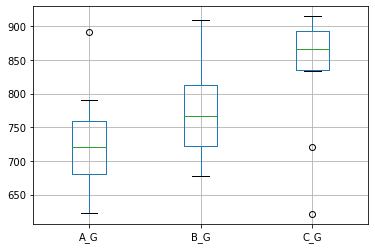

In [15]:
# Group별 boxplot
df.boxplot(['A_G','B_G','C_G'])

In [18]:
# 선형모델 formula
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [20]:
# ANOVA 실행
f_result = stats.f_oneway(df['A_G'], df['B_G'], df['C_G'])

# ANOVA의 f값 p값 저장
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

# ANOVA의 f값, p값 출력
print( "One-way ANOVA ")
print( "F통계량 : {} ".format(f))
print( "p-value : {}".format(p))

One-way ANOVA 
F통계량 : 4.263 
p-value : 0.025


In [23]:
# ANOVA
df = pd.read_csv("/home/piai/test/Practice/data/ANOVA.csv", engine="python")
df.head(3)

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a


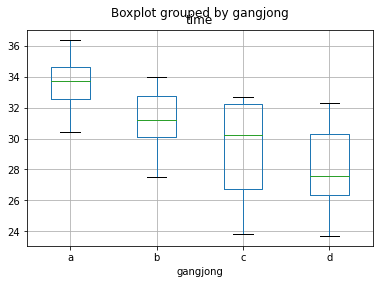

In [24]:
df.boxplot("time", by="gangjong")

In [25]:
# ANOVA 실행
# statsmodels 라이브러리를 사용
formula = 'time ~ C(gangjong)'
lm = ols(formula, df).fit()

print(anova_lm(lm))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


결론 : 유의수준 5%에서 P값이 0.019 이므로 강종별 2차정령 시간에 차이가 있다고 할 수 있다.

In [27]:
# 상관분석
df = pd.read_csv("/home/piai/test/Practice/data/작업시간.csv", engine="python")
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


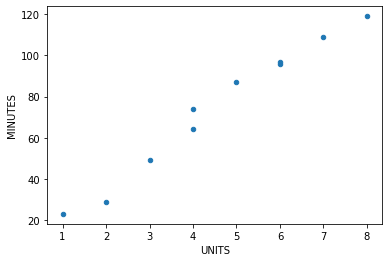

In [28]:
df.plot.scatter(x="UNITS", y="MINUTES")

In [29]:
# 목표변수와 설명변수의 상관분석
df.corr(method = "pearson").round(3)  # kendall, spearman

,UNITS,MINUTES
UNITS,1.000,0.989
MINUTES,0.989,1.000


In [33]:
# Correlation Analysis 실행
corr, pval = stats.pearsonr(df['UNITS'], df['MINUTES'])

# Correlation., p-value 결과 출력
print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:0.989
p-value:0.000


: 부품수리시간과 부품수 간에 "매우 강한 상관성"이 있다고 할 수 있다.

In [36]:
# 초코칩
df = pd.read_csv("/home/piai/test/Practice/data/correlation.csv", engine="python")
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


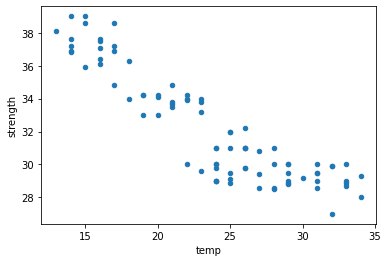

In [35]:
df.plot.scatter(x="temp",y="strength")

In [37]:
# Correlation Analysis 실행
corr, pval = stats.pearsonr(df["temp"], df["strength"])

# Correlation, p-value 결과 출력
print( "Correlation Analysis ")
print( 'corr: {0:0.3f}'.format(corr))
print( 'p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
corr: -0.899
p-value : 0.000


:초코칩의 강도와 재료 반죽온도간에 "매우 강함 음의 상관성"이 있다고 볼 수 있다.

In [43]:
df_raw = pd.read_csv("/home/piai/test/Practice/data/작업시간.csv", engine="python")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


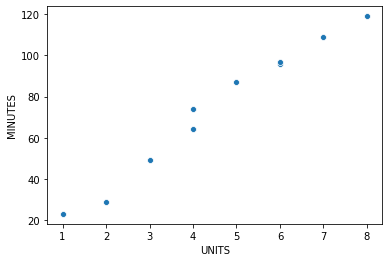

In [44]:
sns.scatterplot(data=df_raw, x="UNITS", y="MINUTES")

In [49]:
# 선형회귀모델
from sklearn.linear_model import LinearRegression

# 선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf

# 선형회귀분석:formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
formula = "MINUTES ~ UNITS"
model = smf.ols(formula, data = df_raw)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           5.82e-08
Time:                        16:03:47   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1712      3.886      1.845      0.1

In [50]:
df = pd.read_csv("/home/piai/test/Practice/data/직무능력평가.csv", engine="python")
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [53]:
# Linear Regression 실행
reg_model = smf.ols("EVAL ~ DISSATIS", data=df)

# 적합
reg_result = reg_model.fit()

# Simple Linear Regression 결과 출력
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.86
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.99e-08
Time:                        16:57:08   Log-Likelihood:                -99.882
No. Observations:                  30   AIC:                             203.8
Df Residuals:                      28   BIC:                             206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3763      6.620      2.172      0.0

: R-squared 값은 0.681이다. 이는 68.1%의 설명력을 가지고 있다는 뜻이다. F 값이 굉장히 크다는 것을 알 수 있다. Prob(Omnibus)는 0.024로 0.05보다 작으므로 정규성을 띄지 않는다고 판단할 수 있다. Durbin-Watson 값은 2.245으로 2에 가까우므로, 자기상관이 없다고 볼 수 있다.

EVAL = 14.3763 + 0.7546 * DISSATIS

정규성이 없으면 다시 처리하는 과정이 필요하다.

가설은 모수로 세운다. 통계량으로 세우지 않는다. 왜냐하면, 의사결정은 모집단에 대한 것이기 때문이다. 예를 들어 평균이면, 모평균이 같다 or 같지않다 이런식으로 세워야한다.

유의수준 : H0가 참일 때, H0를 기각하는 오류. 제 1종 오류, 생산자 위험

구간 추정을 할 수 있어야 됨.

z = 0.05일 때, 1.645
z = 0.025일 때, 1.96
z = 0.005일 때, 2.57

문제가 주어졌을 때, 가설을 세울 수 있어야 됨.

차이가 있느냐 없느냐에 대한 검정은 -> 동일성 검정
빈도에 대해서는 카이스퀘어 검정을 해야된다.

신뢰구간에서 신뢰수준이 커지면 신뢰 구간이 커지냐 작아지냐에 대해서도 알고있기